In [ ]:
# NN assignment #1:
# Train a BPN to solve the XOR problem.

In [2]:
import numpy as np

# 定義 XOR 問題的輸入輸出資料
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

# 設定神經元參數
m = 2  # 輸入層神經元數量
n = 2  # 隱藏層神經元數量
p = 1  # 輸出層神經元數量

# 初始化權重和偏差
W1 = np.random.randn(m, n)
b1 = np.zeros((1, n))
W2 = np.random.randn(n, p)
b2 = np.zeros((1, p))

# 定義sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# 前向傳播
def forward_propagation(X):
    # 計算隱藏層輸出
    z1 = np.dot(X, W1) + b1
    a1 = sigmoid(z1)

    # 計算輸出層輸出
    z2 = np.dot(a1, W2) + b2
    a2 = sigmoid(z2)

    return a1, a2

# 反向傳播
def backward_propagation(X, y, a1, a2):
    # 計算輸出層誤差
    delta2 = (a2 - y) * (a2 * (1 - a2))

    # 計算隱藏層誤差
    delta1 = np.dot(delta2, W2.T) * (a1 * (1 - a1))

    # 更新權重和偏差
    dW2 = np.dot(a1.T, delta2)
    db2 = np.sum(delta2, axis=0, keepdims=True)
    dW1 = np.dot(X.T, delta1)
    db1 = np.sum(delta1, axis=0, keepdims=True)

    return dW1, db1, dW2, db2

# 計算平均誤差
def compute_error(y, a2):
    # 使用均方誤差 (MSE) 計算
    return np.mean((y - a2) ** 2)


# 設定目標誤差和訓練參數
target_error = 0.01 # 允許最大平均誤差
max_retries = 5  # 最大重試次數
retry_count = 0   # 重試計數器
epochs = 10000  # 訓練迭代次數
learning_rate = 0.1 # 學習率

while retry_count < max_retries:
    # 初始化權重和偏差（每次重試重新初始化）
    W1 = np.random.randn(m, n)
    b1 = np.zeros((1, n))
    W2 = np.random.randn(n, p)
    b2 = np.zeros((1, p))

    for epoch in range(epochs):
        a1, a2 = forward_propagation(X)
        dW1, db1, dW2, db2 = backward_propagation(X, y, a1, a2)

        # 更新權重和偏差
        W1 -= learning_rate * dW1
        b1 -= learning_rate * db1
        W2 -= learning_rate * dW2
        b2 -= learning_rate * db2

    # 計算訓練後的平均誤差
    error = compute_error(y, a2)

    if error <= target_error:
        print(f"訓練成功，平均誤差：{error:.4f}")
        break
    else:
        print(f"訓練未達預期，平均誤差：{error:.4f}，重新訓練...")
        retry_count += 1

# 測試模型印出結果
print("測試結果:")
for i in range(len(X)):
    if a2[i][0] > 0.5:
        output = 1
    else:
        output = 0
    print(f"Input: {X[i]}, Output:  {output}")

if retry_count == max_retries:
    print("已達最大重試次數，訓練未成功達成目標誤差。")

訓練成功，平均誤差：0.0020
測試結果:
Input: [0 0], Output:  0
Input: [0 1], Output:  1
Input: [1 0], Output:  1
Input: [1 1], Output:  0


In [3]:
# 用戶自定義輸入並預測結果
print("請輸入兩個數字，表示點的 (x, y) 座標，使用空格分開（例如：0 1）：")
user_input = input()  # 讓用戶輸入數據
x, y = map(float, user_input.split())  # 解析用戶輸入
# 將用戶輸入轉換為 numpy 陣列
input_data = np.array([[x, y]])
# 預測結果
_, predicted_output = forward_propagation(input_data)
# 顯示預測結果
if predicted_output[0][0]>0.5:
  output=1
else:
  output=0
print(f"輸入: ({x}, {y}) -> 預測結果: {output}")

請輸入兩個數字，表示點的 (x, y) 座標，使用空格分開（例如：0 1）：
0 1
輸入: (0.0, 1.0) -> 預測結果: 1


In [1]:
# X:
# 用來儲存 XOR 問題的輸入資料。
# 每個 row 代表一個輸入樣本，共有四個樣本。
# 每個樣本有兩個 feature (0 或 1)，代表兩個輸入位元。

# y:
# 用來儲存 XOR 問題的正確輸出。
# 每個 row 代表一個輸出，對應於 X 中的每個輸入樣本。
# 輸出值為 0 或 1，代表 XOR 運算的結果。

# m, n, p:
# m: 輸入層神經元的數量，在本例中為 2，對應於 X 中每個樣本的 feature 數量。
# n: 隱藏層神經元的數量，在本例中為 2，可以調整以改變模型的複雜度。
# p: 輸出層神經元的數量，在本例中為 1，因為 XOR 問題的輸出只有一個位元。
# W1, b1, W2, b2:

# W1: 輸入層到隱藏層的權重矩陣。
# b1: 隱藏層的偏置向量。
# W2: 隱藏層到輸出層的權重矩陣。
# b2: 輸出層的偏置向量。
# 這些權重和偏置是模型需要學習的參數。

# sigmoid:
# sigmoid 函數，用於計算神經元的輸出。
# 將輸入值映射到 0 到 1 之間，作為神經元的啟用值。

# forward_propagation:
# 前向傳播函數，用於計算給定輸入 X 時，模型的輸出 a2。
# 首先計算隱藏層的輸出 z1 和 a1，然後計算輸出層的輸出 z2 和 a2。

# backward_propagation:
# 反向傳播函數，用於計算每個參數的梯度，以便更新參數。
# 根據輸出層的誤差 delta2，計算隱藏層的誤差 delta1。
# 再根據 delta1 和 delta2，計算權重和偏置的梯度 dW1, db1, dW2, db2。

# epochs, learning_rate:
# epochs: 訓練的迭代次數，即模型對訓練資料進行學習的次數。
# learning_rate: 學習率，用於控制每次更新參數的步長。

In [ ]:
# NN assignment #2: (加分題)
# Train a BPN to classify 2-d points into 4 classes (or 4 quadrants)
# Training sample (x, y, T): 4000 points,
# Testing sample (x, y, T): 1000 points,
# where -1000.0 ≤ x ≤ 1000.0, -1000.0 ≤ y ≤ 1000.0, and Tϵ{(1, 0, 0, 0), (0, 1, 0, 0), (0,
# 0, 1, 0), (0, 0, 0, 1)}.

In [ ]:
import numpy as np

# 生成訓練資料集
X_train = np.random.uniform(-1000, 1000, size=(4000, 2))
y_train = np.zeros((4000, 4))
for i in range(4000):
    x, y = X_train[i]
    # 根據坐標點所在的四個象限,設定正確的類別標籤
    if x >= 0 and y >= 0:
        y_train[i] = [1, 0, 0, 0]
    elif x < 0 and y >= 0:
        y_train[i] = [0, 1, 0, 0]
    elif x < 0 and y < 0:
        y_train[i] = [0, 0, 1, 0]
    else:
        y_train[i] = [0, 0, 0, 1]

# 生成測試資料集
X_test = np.random.uniform(-1000, 1000, size=(1000, 2))
y_test = np.zeros((1000, 4))
for i in range(1000):
    x, y = X_test[i]
    # 根據坐標點所在的四個象限,設定正確的類別標籤
    if x >= 0 and y >= 0:
        y_test[i] = [1, 0, 0, 0]
    elif x < 0 and y >= 0:
        y_test[i] = [0, 1, 0, 0]
    elif x < 0 and y < 0:
        y_test[i] = [0, 0, 1, 0]
    else:
        y_test[i] = [0, 0, 0, 1]


In [ ]:
def sigmoid(x):
    # Sigmoid 激活函數
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    # Sigmoid 激活函數的導數
    return x * (1 - x)

# 設定神經元數量
input_size = 2
hidden_size = 8
output_size = 4

# 初始化權重和偏差
W1 = np.random.randn(input_size, hidden_size)
b1 = np.zeros((1, hidden_size))
W2 = np.random.randn(hidden_size, output_size)
b2 = np.zeros((1, output_size))

# 定義損失函數
def compute_loss(y, a2):
    # 均方誤差 (MSE)
    return np.mean((y - a2) ** 2)

# 前向傳播
def forward_propagation(X):
    # 計算隱藏層的輸出
    z1 = np.dot(X, W1) + b1
    a1 = sigmoid(z1)
    # 計算輸出層的輸出
    z2 = np.dot(a1, W2) + b2
    a2 = sigmoid(z2)
    return a1, a2

# 反向傳播
def backward_propagation(X, y, a1, a2):
    m = X.shape[0]
    # 計算輸出層的誤差
    delta2 = (a2 - y) * sigmoid_derivative(a2)
    # 計算隱藏層的誤差
    delta1 = np.dot(delta2, W2.T) * sigmoid_derivative(a1)

    # 計算權重和偏差的梯度
    dW2 = (1 / m) * np.dot(a1.T, delta2)
    db2 = (1 / m) * np.sum(delta2, axis=0, keepdims=True)
    dW1 = (1 / m) * np.dot(X.T, delta1)
    db1 = (1 / m) * np.sum(delta1, axis=0, keepdims=True)

    return dW1, db1, dW2, db2

In [ ]:
#迭代次數
epochs = 10000

#學習率
learning_rate = 0.1

losses = []
# 訓練模型
for i in range(epochs):
    # 前向傳播,計算輸出
    a1, a2 = forward_propagation(X_train)
    # 反向傳播,計算梯度
    dW1, db1, dW2, db2 = backward_propagation(X_train, y_train, a1, a2)

    # 通過梯度下降法來更新權重和偏差
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2

    loss = compute_loss(y_train, a2)
    losses.append(loss)

    # 每1000次迭代打印一次損失
    if epochs % 1000 == 0:
        print(f"Epoch {epochs}: Loss = {loss:.4f}")

# 評估模型在測試集上的性能
a1, a2 = forward_propagation(X_test)
predictions = np.argmax(a2, axis=1)
true_labels = np.argmax(y_test, axis=1)
accuracy = np.mean(predictions == true_labels)

#印出測試準確度
print(f"Test Accuracy: {accuracy * 100:.2f}%")

<ipython-input-3-9c84f671f87c>:3: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


串流輸出內容已截斷至最後 5000 行。
Epoch 10000: Loss = 0.0072
Epoch 10000: Loss = 0.0071
Epoch 10000: Loss = 0.0070
Epoch 10000: Loss = 0.0070
Epoch 10000: Loss = 0.0071
Epoch 10000: Loss = 0.0070
Epoch 10000: Loss = 0.0070
Epoch 10000: Loss = 0.0071
Epoch 10000: Loss = 0.0070
Epoch 10000: Loss = 0.0070
Epoch 10000: Loss = 0.0071
Epoch 10000: Loss = 0.0070
Epoch 10000: Loss = 0.0071
Epoch 10000: Loss = 0.0072
Epoch 10000: Loss = 0.0070
Epoch 10000: Loss = 0.0070
Epoch 10000: Loss = 0.0072
Epoch 10000: Loss = 0.0070
Epoch 10000: Loss = 0.0070
Epoch 10000: Loss = 0.0071
Epoch 10000: Loss = 0.0070
Epoch 10000: Loss = 0.0070
Epoch 10000: Loss = 0.0072
Epoch 10000: Loss = 0.0070
Epoch 10000: Loss = 0.0070
Epoch 10000: Loss = 0.0072
Epoch 10000: Loss = 0.0070
Epoch 10000: Loss = 0.0070
Epoch 10000: Loss = 0.0071
Epoch 10000: Loss = 0.0070
Epoch 10000: Loss = 0.0070
Epoch 10000: Loss = 0.0071
Epoch 10000: Loss = 0.0070
Epoch 10000: Loss = 0.0071
Epoch 10000: Loss = 0.0071
Epoch 10000: Loss = 0.0071
Epoch 1

In [ ]:
print("Shapes:")
print("W1:", W1.shape, "b1:", b1.shape)
print("W2:", W2.shape, "b2:", b2.shape)
print("dW1:", dW1.shape, "db1:", db1.shape)
print("dW2:", dW2.shape, "db2:", db2.shape)

Shapes:
W1: (2, 8) b1: (1, 8)
W2: (8, 4) b2: (1, 4)
dW1: (2, 8) db1: (1, 8)
dW2: (8, 4) db2: (1, 4)


In [ ]:
# 新增的輸入判斷函數
def classify_point(x, y):
    if x == 0 and y == 0:
        return "原點"
    elif x == 0:
        return "y軸"
    elif y == 0:
        return "x軸"

    # 如果不在軸上，使用 forward_propagation 計算
    a1, a2 = forward_propagation(np.array([[x, y]]))
    prediction = np.argmax(a2[0])
    if prediction == 0:
        return "第一象限"
    elif prediction == 1:
        return "第二象限"
    elif prediction == 2:
        return "第三象限"
    else:
        return "第四象限"

# 測試輸入判斷
print(classify_point(500, 500))   # 第一象限
print(classify_point(-500, 500))   # 第二象限
print(classify_point(-500, -500))  # 第三象限
print(classify_point(500, -500))   # 第四象限
print(classify_point(0, 0))       # 原點
print(classify_point(0, 500))      # y軸
print(classify_point(500, 0))      # x軸
# 使用 forward_propagation 計算輸入點的輸出層預測值
# 然後使用 np.argmax 找到預測值最大的類別索引,並根據索引返回對應的象限名稱。

第一象限
第二象限
第三象限
第四象限
原點
y軸
x軸


<ipython-input-33-c23f2c7f49de>:3: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


<ipython-input-33-c23f2c7f49de>:3: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


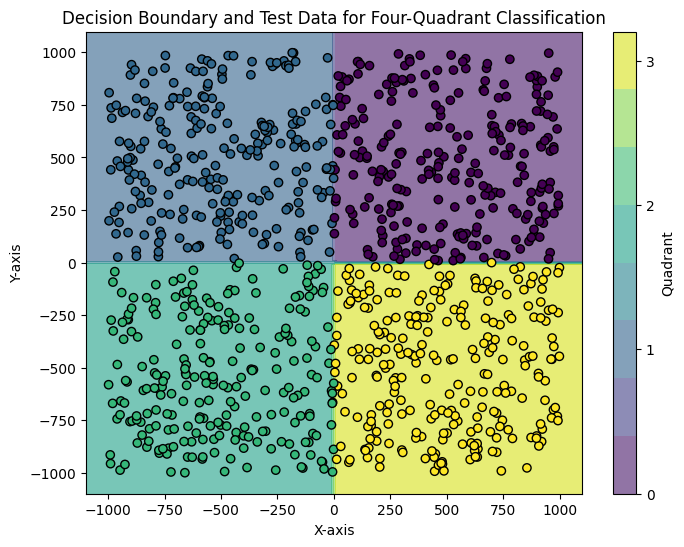

In [ ]:
import matplotlib.pyplot as plt

# 定義決策邊界繪製函數
def plot_decision_boundary():
    # 建立網格範圍，這樣決策邊界能覆蓋到所有測試資料點
    # x軸範圍為測試數據的最小值到最大值，加上一定的邊界
    x_min, x_max = X_test[:, 0].min() - 100, X_test[:, 0].max() + 100
    # y軸範圍為測試數據的最小值到最大值，加上一定的邊界
    y_min, y_max = X_test[:, 1].min() - 100, X_test[:, 1].max() + 100

    # 使用 np.meshgrid 生成一個網格，這樣能夠遍歷每個區域
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),  # 在 x 軸生成 100 個點
                         np.linspace(y_min, y_max, 100))  # 在 y 軸生成 100 個點
    grid_points = np.c_[xx.ravel(), yy.ravel()]  # 將生成的網格點轉換為二維坐標對

    # 計算每個網格點的分類結果
    _, grid_predictions = forward_propagation(grid_points)  # 使用前向傳播計算每個點的預測結果
    grid_predictions = np.argmax(grid_predictions, axis=1)  # 取最大值的索引，對應分類

    # 將結果轉為網格形狀，這樣能夠繪製出圖像
    grid_predictions = grid_predictions.reshape(xx.shape)

    # 繪製分類邊界
    plt.figure(figsize=(8, 6))  # 設定圖形大小
    plt.contourf(xx, yy, grid_predictions, alpha=0.6, cmap='viridis')  # 畫出決策邊界
    # 設定顏色條，並且顯示對應的四個象限
    plt.colorbar(ticks=[0, 1, 2, 3], label='Quadrant')
    # 繪製測試資料點，並依據分類顯示顏色
    plt.scatter(X_test[:, 0], X_test[:, 1], c=np.argmax(y_test, axis=1), edgecolors='k', cmap='viridis')
    plt.title('Decision Boundary and Test Data for Four-Quadrant Classification')  # 設置標題
    plt.xlabel('X-axis')  # 設置 x 軸標籤
    plt.ylabel('Y-axis')  # 設置 y 軸標籤
    plt.show()  # 顯示圖形

# 調用決策邊界繪製函數
plot_decision_boundary()
